In [65]:
%matplotlib inline

In [66]:
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import pandas as pd

from scipy.stats import linregress

In [67]:
# Study data files
world_suicide_data_path = "Suicide_Data/master.csv"
continents_list_data_path = "Suicide_Data/continents.csv"

# Read the data and the study results
world_suicide_data = pd.read_csv(world_suicide_data_path)
continents_list_data = pd.read_csv(continents_list_data_path)


In [68]:
world_suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [69]:
continents_list_data.head()

,country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Aruba,South America
3,Benin,Africa
4,United States,North America


In [70]:
merged_suicide_df = pd.merge(world_suicide_data, continents_list_data, on='country', how='left')
merged_suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe


    ## Not able to do this
    

In [71]:
# Move continent to the first column of df


# first_col = merged_suicide_df.pop(Continent)

In [72]:
# Data analysis
merged_suicide_df['year'].value_counts()

2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [84]:
# year_counts = merged_suicide_df.groupby(['Continent', 'country'])['suicides_no'].agg(['sum'])
suicide_by_continent = merged_suicide_df.groupby('Continent')['suicides_no'].agg(['sum'])

suicide_by_continent.head()

,sum
Continent,
Africa,11355
Asia,2396963
Europe,2205902
North America,1340538
Oceania,84851


<ipython-input-85-6a2f7ce5eb54>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.figure.show()


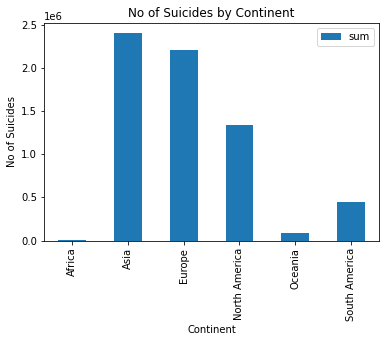

In [85]:
# continent_suicide_plot = suicide_by_continent.plot.bar(x='Continent', y='sum', rot=0)
# plt.show()

fig = suicide_by_continent.plot.bar()

plt.title("No of Suicides by Continent")
plt.xlabel('Continent')
plt.ylabel('No of Suicides')
# plt.legend(label_list, loc='right', bbox_to_anchor=(1.2, 0.5));

fig.figure.show()

In [86]:
suicide_per_100k_by_continent = merged_suicide_df.groupby('Continent')['suicides/100k pop'].agg(['sum'])

suicide_per_100k_by_continent.head()

,sum
Continent,
Africa,6445.61
Asia,57550.58
Europe,191306.36
North America,42987.09
Oceania,11238.10


<ipython-input-87-7f025b841ea0>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.figure.show()


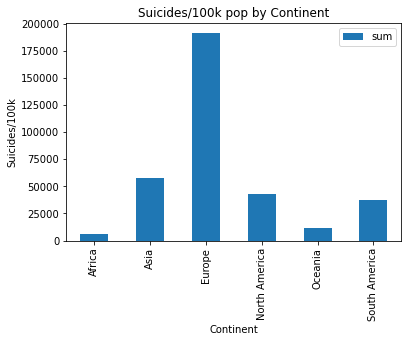

In [87]:
fig = suicide_per_100k_by_continent.plot.bar()

plt.title("Suicides/100k pop by Continent")
plt.xlabel('Continent')
plt.ylabel('Suicides/100k')

fig.figure.show()